In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st
import researchpy as rs
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm

In [59]:
df=pd.read_excel("ex15.xlsx")

In [60]:
df.head(3)

,Empresa,Itens,Lojas,Faturamento
0,A,2500,3,250000
1,B,2700,3,240000
2,C,4000,4,310000


In [61]:
variaveis = ["Itens", "Lojas", "Faturamento"]

In [62]:
z_variaveis = []
for var in variaveis:
    z_variaveis.append("z_" + var)

In [63]:
z_variaveis

['z_Itens', 'z_Lojas', 'z_Faturamento']

In [64]:
X = df[variaveis]
X_std = StandardScaler().fit_transform(X)

In [65]:
X_std

array([[-0.64286731, -0.61632153, -0.81568722],
       [-0.63282251, -0.61632153, -0.84069296],
       [-0.5675313 , -0.43068251, -0.66565278],
       [-0.5825985 , -0.61632153, -0.46560687],
       [-0.27372085, -0.2450435 , -0.09052078],
       [ 0.08538082,  0.12623453,  0.40959401],
       [ 0.48717289,  0.31187355,  0.68465715],
       [-0.5876209 , -0.61632153, -0.71566426],
       [-0.5424193 , -0.43068251, -0.56562983],
       [-0.42188168, -0.43068251, -0.31557243],
       [-0.12556002,  0.31187355,  0.18454236],
       [ 0.83874095,  1.79698566,  1.00973176],
       [-0.71820333, -0.98759956, -1.14076183],
       [-0.70815853, -0.80196054, -0.96572166],
       [-0.69560252, -0.61632153, -0.96572166],
       [-0.04017921, -0.05940448,  0.29706818],
       [-0.34152326, -0.2450435 , -0.21554947],
       [-0.27623205, -0.61632153, -0.01550356],
       [ 2.84770131,  2.16826369,  1.68488673],
       [-0.5424193 , -0.61632153, -0.71566426],
       [ 0.98941298,  0.68315157,  1.059

In [66]:
df = pd.concat([df, pd.DataFrame(X_std, columns=z_variaveis)], axis=1)

In [67]:
distance.cdist(df[variaveis], 
               df[variaveis], 'sqeuclidean')

array([[0.00000000e+00, 1.00040000e+08, 3.60225000e+09, 1.96014400e+10,
        8.41540225e+10, 2.40310250e+11, 3.60506250e+11, 1.60121000e+09,
        1.00040000e+10, 4.00193600e+10, 1.60106090e+11, 5.33770250e+11,
        1.69022500e+10, 3.60169000e+09, 3.60110250e+09, 1.98169000e+11,
        5.76360000e+10, 1.02453290e+11, 1.00483025e+12, 1.60400000e+09,
        5.63556250e+11, 3.25110250e+11, 2.56202500e+10, 2.89585225e+12,
        1.96202500e+10],
       [1.00040000e+08, 0.00000000e+00, 4.90169000e+09, 2.25010000e+10,
        9.00511225e+10, 2.50204490e+11, 3.72597290e+11, 2.50081000e+09,
        1.21032400e+10, 4.41176400e+10, 1.68202010e+11, 5.48458490e+11,
        1.44028900e+10, 2.50225000e+09, 2.50156250e+09, 2.07164240e+11,
        6.25336400e+10, 1.08950410e+11, 1.02490249e+12, 2.50324000e+09,
        5.78643290e+11, 3.36604490e+11, 2.89184900e+10, 2.92992169e+12,
        2.25184900e+10],
       [3.60225000e+09, 4.90169000e+09, 0.00000000e+00, 6.40009000e+09,
        5.2934

(-3, 3)

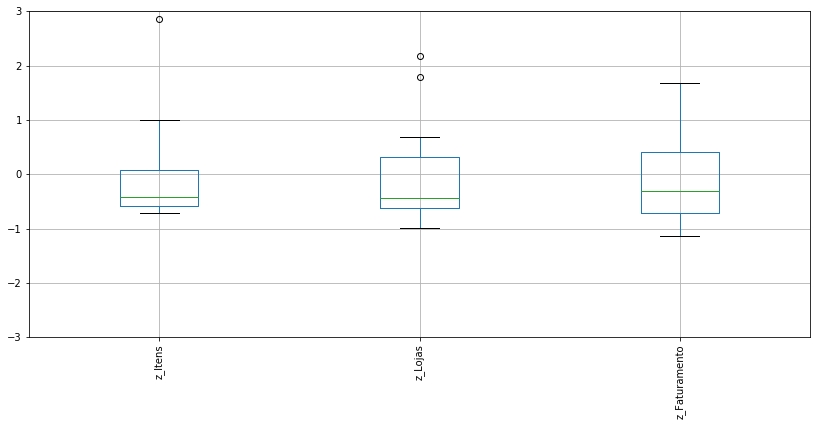

In [68]:
df[z_variaveis].boxplot(rot=90,figsize=[14,6])
plt.ylim(-3,3)

In [69]:
Z = linkage(df[z_variaveis], method='average', metric='sqeuclidean')

In [70]:
print ('Planejamento da Aglomeração\n')
print(Z)

Planejamento da Aglomeração

[[0.00000000e+00 1.00000000e+00 7.26185050e-04 2.00000000e+00]
 [7.00000000e+00 1.90000000e+01 2.04318537e-03 2.00000000e+00]
 [9.00000000e+00 2.20000000e+01 1.00298166e-02 2.00000000e+00]
 [2.00000000e+00 8.00000000e+00 1.06352049e-02 2.00000000e+00]
 [2.50000000e+01 2.60000000e+01 1.86578579e-02 4.00000000e+00]
 [4.00000000e+00 1.60000000e+01 2.02293423e-02 2.00000000e+00]
 [3.00000000e+00 2.40000000e+01 2.74694922e-02 2.00000000e+00]
 [1.30000000e+01 1.40000000e+01 3.46194970e-02 2.00000000e+00]
 [2.70000000e+01 3.10000000e+01 6.02987379e-02 4.00000000e+00]
 [5.00000000e+00 1.50000000e+01 6.28892250e-02 2.00000000e+00]
 [2.80000000e+01 2.90000000e+01 6.85417411e-02 6.00000000e+00]
 [1.20000000e+01 3.20000000e+01 1.17099520e-01 3.00000000e+00]
 [1.00000000e+01 3.40000000e+01 1.43702725e-01 3.00000000e+00]
 [3.30000000e+01 3.50000000e+01 1.44588678e-01 1.00000000e+01]
 [1.70000000e+01 3.00000000e+01 1.62804975e-01 3.00000000e+00]
 [6.00000000e+00 2.1000000

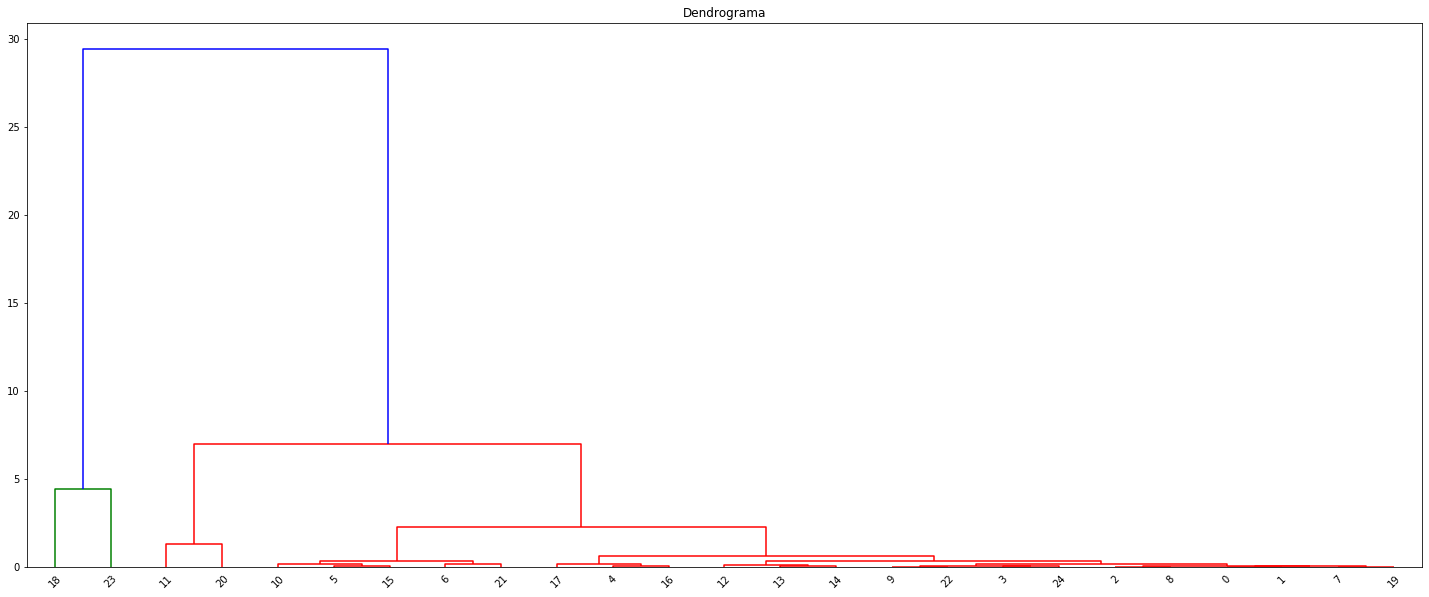

In [71]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title("Dendrograma") 
plt.show()

In [72]:
parada = pd.DataFrame(Z, columns=["c1", "c2", "dist", "n"])

In [73]:
# As primeiras 5 linhas do Daframe Criado
parada.head()

,c1,c2,dist,n
0,0.0,1.0,0.000726,2.0
1,7.0,19.0,0.002043,2.0
2,9.0,22.0,0.010030,2.0
3,2.0,8.0,0.010635,2.0
4,25.0,26.0,0.018658,4.0


In [76]:
parada['heterogeneidade'] = ((parada['dist'].shift(-1) - parada['dist']) / parada['dist']) * 100

In [77]:
parada.tail(10)

,c1,c2,dist,n,heterogeneidade
14,17.0,30.0,0.162805,3.0,2.616306
15,6.0,21.0,0.167064,2.0,100.948958
16,37.0,40.0,0.335714,5.0,4.923837
17,36.0,38.0,0.352244,13.0,72.416431
18,39.0,42.0,0.607327,16.0,108.426347
19,11.0,20.0,1.265830,2.0,78.786601
20,41.0,43.0,2.263134,21.0,95.663775
21,18.0,23.0,4.428133,2.0,58.009874
22,44.0,45.0,6.996887,23.0,320.249464
23,46.0,47.0,29.404381,25.0,NaN


In [91]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='sqeuclidean', linkage='average')  

In [92]:
cluster.fit_predict(df[z_variaveis])

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 3, 2, 0, 1,
       2, 4, 2], dtype=int64)

In [93]:
cluster.fit(df[z_variaveis])

AgglomerativeClustering(affinity='sqeuclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [94]:
cluster.get_params()

{'affinity': 'sqeuclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'average',
 'memory': None,
 'n_clusters': 5,
 'pooling_func': 'deprecated'}

In [95]:
cluster.labels_

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 3, 2, 0, 1,
       2, 4, 2], dtype=int64)

In [96]:
cluster.n_leaves_

25

In [97]:
cluster.n_clusters

5

In [98]:
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo1'])], axis=1)

In [99]:
df.head(3)

,Empresa,Itens,Lojas,Faturamento,z_Itens,z_Lojas,z_Faturamento,grupo,grupo1
0,A,2500,3,250000,-0.642867,-0.616322,-0.815687,0,2
1,B,2700,3,240000,-0.632823,-0.616322,-0.840693,0,2
2,C,4000,4,310000,-0.567531,-0.430683,-0.665653,0,2


In [100]:
df.groupby('grupo1').count()['Empresa']

grupo1
0     2
1     5
2    16
3     1
4     1
Name: Empresa, dtype: int64

In [101]:
grupo_3 = df.groupby('grupo1').mean()[z_variaveis].round(2)

In [102]:
grupo_3

,z_Itens,z_Lojas,z_Faturamento
grupo1,,,
0,0.91,1.24,1.03
1,0.10,0.20,0.44
2,-0.52,-0.56,-0.59
3,2.85,2.17,1.68
4,3.20,3.28,3.44


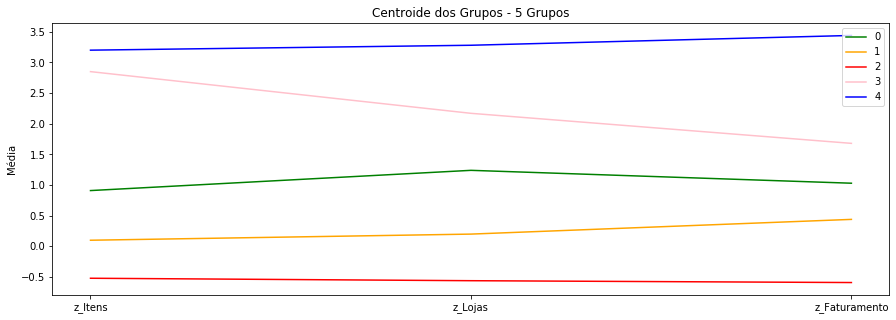

In [103]:
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_3.loc[0], color='g')
plt.plot(z_variaveis, grupo_3.loc[1], color='orange')
plt.plot(z_variaveis, grupo_3.loc[2], color='red')
plt.plot(z_variaveis, grupo_3.loc[3], color='pink')
plt.plot(z_variaveis, grupo_3.loc[4], color='blue')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 5 Grupos')
plt.legend(["0","1", "2", "3", "4"], loc=1)
plt.show()

In [104]:
kmeans = KMeans(n_clusters=5, init=grupo_3, n_init=1).fit(df[z_variaveis])

In [105]:
kmeans

KMeans(algorithm='auto', copy_x=True,
       init=        z_Itens  z_Lojas  z_Faturamento
grupo1                                 
0          0.91     1.24           1.03
1          0.10     0.20           0.44
2         -0.52    -0.56          -0.59
3          2.85     2.17           1.68
4          3.20     3.28           3.44,
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [106]:
df['kmeans'] = kmeans.labels_

In [107]:
# Quantidade de casos por grupo
lens = []
for i in np.sort(list(df['kmeans'].unique())):
    lens.append(len(df.loc[df['kmeans'] == i,:]))
    print("Cluster ", i, ": ", lens[i])

Cluster  0 :  2
Cluster  1 :  5
Cluster  2 :  16
Cluster  3 :  1
Cluster  4 :  1


In [108]:
# Gera o centroide final dos grupos.
k_means_centro = df.groupby('kmeans').mean()[z_variaveis].round(2)

In [109]:
k_means_centro

,z_Itens,z_Lojas,z_Faturamento
kmeans,,,
0,0.91,1.24,1.03
1,0.10,0.20,0.44
2,-0.52,-0.56,-0.59
3,2.85,2.17,1.68
4,3.20,3.28,3.44


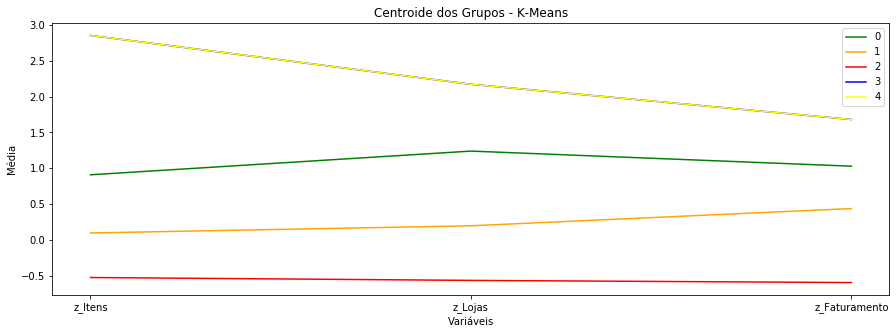

In [110]:

plt.figure(figsize=(15,5))
plt.plot(z_variaveis, k_means_centro.loc[0], color='g')
plt.plot(z_variaveis, k_means_centro.loc[1], color='orange')
plt.plot(z_variaveis, k_means_centro.loc[2], color='red')
plt.plot(z_variaveis, k_means_centro.loc[3], color='blue')
plt.plot(z_variaveis, k_means_centro.loc[3], color='yellow')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - K-Means')
plt.legend(["0","1","2", "3", "4"], loc=1)
plt.show()

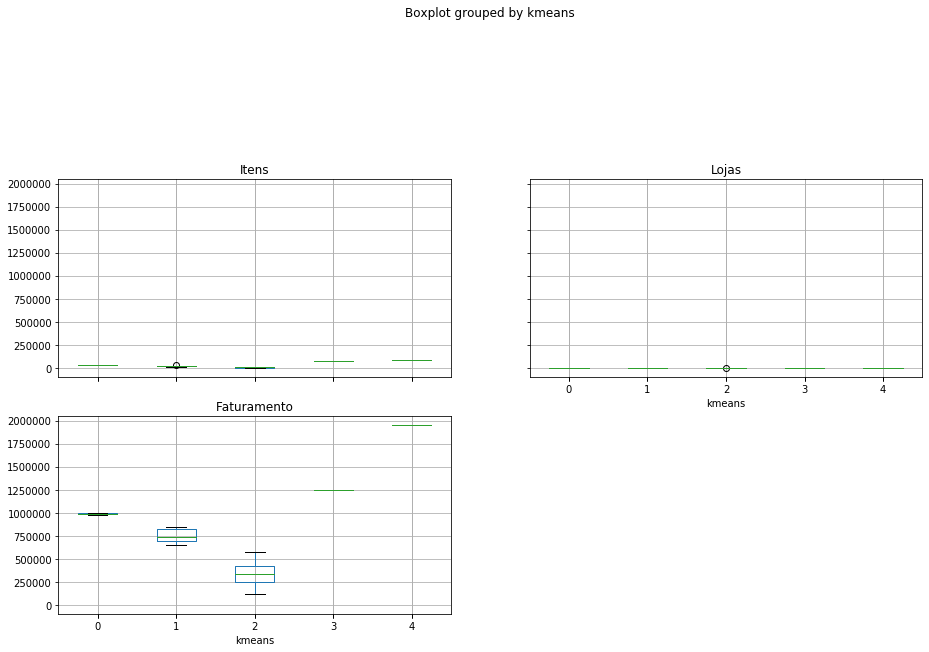

In [111]:
boxplot = df.boxplot(column=variaveis, by='kmeans', layout=(7,2), figsize=[15,30], showfliers=True)